# DATA601 WAN
# Chicago Public Schools
### Project 2: Answer a question
### Description:
* In Project 1, I looked through the datasets of different Chicago Public Schools to see how schools were performing.   
* **In Project 2, I would like to explore the trends and compare neighborhood and charter schools over the last 4 years.**
---

### Background on School Types:
As explored in project 1, Chicago has many different kinds of schools that perform very differently for students. Recently, Chicago, as well as the US, has seen a growth in popularity in Charter Schools, which serve as an educational alternative to public education. In Chicago, 1 in 4 now attends a charter high school (1). Nationwide, 6 percent of students attended charter schools in 2017, up from 1 percent in 2000 (2).

One of the pressing questions in Education is whether are not Charter schools perform better than other school types in terms of delivering a better 
education for students. As an equivalent, neighborhood schools are the best public school comparison group, as they are not selective, unlike selective schools, and magnet schools. They are also the most common school type for students in Chicago Public Schools.

### How can we define neighborhood vs. charter schools?

<blockquote> Neighborhood Schools: Schools that are open to enrollment from anyone. (http://cpstiers.opencityapps.org/about.html)  </blockquote>

<blockquote> Charter Schools: Schools that offer free, independent educational alternatives. They "do not have special entrance requirements", so they are an applicable alternative to Neighborhood schools and "have the freedom to be innovative, while being held accountable for advancing student achievement." (1) </blockquote>

### Project Question:
Are Chicago's charter high schools leading to better Educational outcomes than neighborhood high school equivalents *(college entrance, graduation rates, and attendance rates)*?

### References:
1. https://www.incschools.org/get-the-facts/
2.  (https://nces.ed.gov/programs/coe/indicator_cgb.asp#:~:text=Between%20fall%202000%20and%20fall,from%201%20to%206%20percent

---


In [243]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

### Dataset Sources:   
For this project, I will look at the last 4 years of school progress report data (the only publically-available years from CPS).

| Data | Name |
|---- | ----- |
| 1. cps_1516_df: | Chicago Public Schools Report Card 2015-2016
| 2. cps_1617_df: | Chicago Public Schools Report Card 2016-2017
| 3. cps_1718_df: | Chicago Public Schools Report Card 2017-2018
| 4. cps_1819_df: |Chicago Public Schools Report Card 2018-2019
Source: https://data.cityofchicago.org/  

In [244]:
#Import each dataset (Chicago Public Schools)
start_time = time.time()

cps_1516_df = pd.read_csv("https://data.cityofchicago.org/api/views/fvrx-esxp/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1617_df = pd.read_csv("https://data.cityofchicago.org/api/views/cp7s-7gxg/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1718_df = pd.read_csv("https://data.cityofchicago.org/api/views/wkiz-8iya/rows.csv?accessType=DOWNLOAD&bom=true&format=true")
cps_1819_df = pd.read_csv("https://data.cityofchicago.org/api/views/dw27-rash/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

dur = time.time()- start_time

print(f"{round(dur,3)}s")

5.716s


In [245]:
#Small function for displaying many elements in a list in-line
def show_all(input_list, line_len = 3):
    num_in_line = 0

    for elem in input_list:
        if num_in_line > line_len - 1:
            print(f"")
            print(elem, end = ', ')
            num_in_line = 0
        
        else:
            print(elem, end = ', ')
        
        num_in_line += 1

# 1. Data Preparation (Merging the dataset and checking for nulls)
- Briefly explore each of the datasets per year to see if they are roughly the same
- Merge the Dataset on a value
- Check for issues/nulls

REF: https://pandas.pydata.org/docs/user_guide/merging.html

## 1b. Are the columns of yearly progress report the same?
- check by comparing the sizes of each

In [246]:
#Introduce the four years' datasets
all_dfs = [cps_1516_df,
           cps_1617_df,
           cps_1718_df,
           cps_1819_df]

for dataframe in all_dfs:
    print(f"elem:{dataframe.size} | cols:{(dataframe.shape)}")

elem:102510 | cols:(670, 153)
elem:106421 | cols:(661, 161)
elem:107743 | cols:(661, 163)
elem:119028 | cols:(654, 182)


*Note:* Most of the dataframes are pretty similar. There are a few differences in school count between the first dataframe and the others, and the number of columns increases per year, but they are not tremendously different here. 

We should not have any problems combining the data.

### Compare Each Dataframe's Columns
Let's compare the dataframes to see if any of the columns are different with each one.  
*This check only goes one way (it checks what something lacks, but not what it might have that the other dataframe does not).* 

In [247]:
#Checks the columns and appends to list all values that are not in one.
def compare_cols(df1, df2):
    not_in = []

    for elem in df1.columns:
        if elem not in df2.columns:
            not_in.append(elem)        

    return not_in

In [248]:
#Compare elements between columns
show_all(compare_cols(cps_1516_df,cps_1617_df),5)

In [249]:
show_all(compare_cols(cps_1617_df,cps_1718_df),5)

Address, City, State, Zip, Growth_ACT_Grade_11_Pct, 
Growth_ACT_Grade_11_Lbl, Attainment_ACT_Grade_11_Pct, Attainment_ACT_Grade_11_Lbl, School_Latitude, School_Longitude, 

In [250]:
show_all(compare_cols(cps_1718_df,cps_1819_df),5)

PSAT_9_Average, PSAT_10_Average, SAT_School_Average, SAT_District_Average, PSAT_9_Growth_Pct, 
PSAT_10_Growth_Pct, SAT_Growth_Pct, PSAT_9_Attainment_Pct, PSAT_10_Attainment_Pct, SAT_Attainment_Pct, 
Location, 

So, there are a few different variables, but overall the data is *mostly* the same.

## 1c. Merge the datasets
- Merge them on School_ID
Recast all School_ID as INT so that we can merge them
Note: One issue is that the 1718 and 1819 datasets have school_id as a string (with an included comma), wheras the 1516 and 1617 have them as an int.  

We have to remove the comma and recast them as ints so that they can be merged. 
- drop commas ("000,000" -> 000000)
- recast as INT

In [251]:
#Drop "," and replace Columns as 'int' for cps_1718 and cps_1819
cps_1718_df['School_ID'] = cps_1718_df['School_ID'].apply(lambda x:int(x.replace(",","")))
cps_1819_df['School_ID'] = cps_1819_df['School_ID'].apply(lambda x:int(x.replace(",","")))

In [252]:
#Merge the datasets together. (Outer join to keep all data)
df_1517 = cps_1516_df.merge(cps_1617_df, how = "outer", on="School_ID", suffixes=('_1516','_1617'))
df_1719 = cps_1718_df.merge(cps_1819_df, how = "outer",  on = "School_ID",suffixes = ('_1718','_1819'))

#Join the data again
full_df = df_1517.merge(df_1719, how = "outer", on="School_ID")

### Check the merged dataset

In [253]:
full_df.head(2)

,School_ID,Short_Name_1516,Long_Name_1516,School_Type_1516,Primary_Category_1516,Address_1516,City_1516,State_1516,Zip_1516,Phone_1516,Fax_1516,CPS_School_Profile_1516,Website_1516,Progress_Report_Year_1516,Blue_Ribbon_Award_Year_1516,Excelerate_Award_Gold_Year_1516,Spot_Light_Award_Year_1516,Improvement_Award_Year_1516,Excellence_Award_Year_1516,Student_Growth_Rating_1516,Student_Growth_Description_1516,Growth_Reading_Grades_Tested_Pct_ES_1516,Growth_Reading_Grades_Tested_Label_ES_1516,Growth_Math_Grades_Tested_Pct_ES_1516,Growth_Math_Grades_Tested_Label_ES_1516,Student_Attainment_Rating_1516,Student_Attainment_Description_1516,Attainment_Reading_Pct_ES_1516,Attainment_Reading_Lbl_ES_1516,Attainment_Math_Pct_ES_1516,Attainment_Math_Lbl_ES_1516,Culture_Climate_Rating_1516,Culture_Climate_Description_1516,School_Survey_Student_Response_Rate_Pct_1516,School_Survey_Student_Response_Rate_Avg_Pct_1516,School_Survey_Teacher_Response_Rate_Pct_1516,School_Survey_Teacher_Response_Rate_Avg_Pct_1516,Healthy_School_Certification_1516,Healthy_School_Certification_Description_1516,Creative_School_Certification_1516,...,College_Persistence_School_Pct_Year_2_1819,College_Persistence_CPS_Pct_Year_2_1819,College_Persistence_School_Pct_Year_1_1819,College_Persistence_CPS_Pct_Year_1_1819,Progress_Toward_Graduation_Year_1_1819,Progress_Toward_Graduation_Year_2_1819,State_School_Report_Card_URL_1819,Mobility_Rate_Pct_1819,Chronic_Truancy_Pct_1819,Empty_Progress_Report_Message_1819,School_Survey_Rating_Description_1819,Supportive_School_Award_1819,Supportive_School_Award_Desc_1819,Parent_Survey_Results_Year_1819,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649.0,7.735358e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.southshoreinternational.org,2015.0,NaN,NaN,NaN,2012.0,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,ORGANIZED,Results are based on student and teacher respo...,81.1,81.2,90.5,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,68.1,72.3,63.0,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,2.9,45.4,NaN,This school does not have enough data for a re...,NOT RATED,This school has not submitted an action plan t...,"2,018",41.758792,-87.576353,818,891,929,969.0,9.0,9th,92.0,92nd,5.0,5th,35.7,35.7,45.9,45.9,18.5,18.5,34.1,34.1,29.0,29th,33.0,33rd,37.0,37th
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612.0,7.735348e+09,3.128500e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.chicagobullscollegeprep.org,2015.0,NaN,NaN,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,ABOVE AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,59.3,81.2,72.4,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,8

### View Merged Dataframe / Info

In [254]:
full_df.head(3)

,School_ID,Short_Name_1516,Long_Name_1516,School_Type_1516,Primary_Category_1516,Address_1516,City_1516,State_1516,Zip_1516,Phone_1516,Fax_1516,CPS_School_Profile_1516,Website_1516,Progress_Report_Year_1516,Blue_Ribbon_Award_Year_1516,Excelerate_Award_Gold_Year_1516,Spot_Light_Award_Year_1516,Improvement_Award_Year_1516,Excellence_Award_Year_1516,Student_Growth_Rating_1516,Student_Growth_Description_1516,Growth_Reading_Grades_Tested_Pct_ES_1516,Growth_Reading_Grades_Tested_Label_ES_1516,Growth_Math_Grades_Tested_Pct_ES_1516,Growth_Math_Grades_Tested_Label_ES_1516,Student_Attainment_Rating_1516,Student_Attainment_Description_1516,Attainment_Reading_Pct_ES_1516,Attainment_Reading_Lbl_ES_1516,Attainment_Math_Pct_ES_1516,Attainment_Math_Lbl_ES_1516,Culture_Climate_Rating_1516,Culture_Climate_Description_1516,School_Survey_Student_Response_Rate_Pct_1516,School_Survey_Student_Response_Rate_Avg_Pct_1516,School_Survey_Teacher_Response_Rate_Pct_1516,School_Survey_Teacher_Response_Rate_Avg_Pct_1516,Healthy_School_Certification_1516,Healthy_School_Certification_Description_1516,Creative_School_Certification_1516,...,College_Persistence_School_Pct_Year_2_1819,College_Persistence_CPS_Pct_Year_2_1819,College_Persistence_School_Pct_Year_1_1819,College_Persistence_CPS_Pct_Year_1_1819,Progress_Toward_Graduation_Year_1_1819,Progress_Toward_Graduation_Year_2_1819,State_School_Report_Card_URL_1819,Mobility_Rate_Pct_1819,Chronic_Truancy_Pct_1819,Empty_Progress_Report_Message_1819,School_Survey_Rating_Description_1819,Supportive_School_Award_1819,Supportive_School_Award_Desc_1819,Parent_Survey_Results_Year_1819,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649.0,7.735358e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.southshoreinternational.org,2015.0,NaN,NaN,NaN,2012.0,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,ORGANIZED,Results are based on student and teacher respo...,81.1,81.2,90.5,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,68.1,72.3,63.0,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,2.9,45.4,NaN,This school does not have enough data for a re...,NOT RATED,This school has not submitted an action plan t...,"2,018",41.758792,-87.576353,818,891,929,969.0,9.0,9th,92.0,92nd,5.0,5th,35.7,35.7,45.9,45.9,18.5,18.5,34.1,34.1,29.0,29th,33.0,33rd,37.0,37th
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612.0,7.735348e+09,3.128500e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.chicagobullscollegeprep.org,2015.0,NaN,NaN,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,ABOVE AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,59.3,81.2,72.4,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,8

In [255]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 677
Columns: 656 entries, School_ID to Growth_SAT_Math_Grade_11_School_Lbl
dtypes: float64(345), int64(1), object(310)
memory usage: 3.4+ MB


In [256]:
#What kinds of data are in the new dataframe?
full_df.dtypes.value_counts()

float64    345
object     310
int64        1
dtype: int64

In [257]:
#What percent of the data is null?
(full_df.isna().sum().sum()) / (full_df.size)

0.29766754802503775

**Note:** Discussed in project 1, the number of nulls is mainly due to certain data types and assessment data tied to different levels of schooling.

# 2. Comparing College Entrance Rates, Charter High Schools vs. Neighborhood High Schools
One of the major indicators of how successful schools are at delivering education is looking at College Entrance enrollment rates. In this section, we will look at...
- How successful are Charter Schools vs. Neighborhood Schools at getting students into College? 
- Is it a significant difference?

**Null Hypothesis (h0) = There is no difference in College Entrance rates between Neighborhood Schools and Charter Schools.  
Alternate Hypothesis (h1) = There is a significant difference in College Entrance rates between Neighborhood Schools and Charter Schools.**

In [258]:
#Head of the new dataframe
full_df.head(3)

,School_ID,Short_Name_1516,Long_Name_1516,School_Type_1516,Primary_Category_1516,Address_1516,City_1516,State_1516,Zip_1516,Phone_1516,Fax_1516,CPS_School_Profile_1516,Website_1516,Progress_Report_Year_1516,Blue_Ribbon_Award_Year_1516,Excelerate_Award_Gold_Year_1516,Spot_Light_Award_Year_1516,Improvement_Award_Year_1516,Excellence_Award_Year_1516,Student_Growth_Rating_1516,Student_Growth_Description_1516,Growth_Reading_Grades_Tested_Pct_ES_1516,Growth_Reading_Grades_Tested_Label_ES_1516,Growth_Math_Grades_Tested_Pct_ES_1516,Growth_Math_Grades_Tested_Label_ES_1516,Student_Attainment_Rating_1516,Student_Attainment_Description_1516,Attainment_Reading_Pct_ES_1516,Attainment_Reading_Lbl_ES_1516,Attainment_Math_Pct_ES_1516,Attainment_Math_Lbl_ES_1516,Culture_Climate_Rating_1516,Culture_Climate_Description_1516,School_Survey_Student_Response_Rate_Pct_1516,School_Survey_Student_Response_Rate_Avg_Pct_1516,School_Survey_Teacher_Response_Rate_Pct_1516,School_Survey_Teacher_Response_Rate_Avg_Pct_1516,Healthy_School_Certification_1516,Healthy_School_Certification_Description_1516,Creative_School_Certification_1516,...,College_Persistence_School_Pct_Year_2_1819,College_Persistence_CPS_Pct_Year_2_1819,College_Persistence_School_Pct_Year_1_1819,College_Persistence_CPS_Pct_Year_1_1819,Progress_Toward_Graduation_Year_1_1819,Progress_Toward_Graduation_Year_2_1819,State_School_Report_Card_URL_1819,Mobility_Rate_Pct_1819,Chronic_Truancy_Pct_1819,Empty_Progress_Report_Message_1819,School_Survey_Rating_Description_1819,Supportive_School_Award_1819,Supportive_School_Award_Desc_1819,Parent_Survey_Results_Year_1819,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,610547,SOUTH SHORE INTL HS,South Shore Intl College Prep High School,Selective enrollment,HS,1955 E 75TH ST,Chicago,Illinois,60649.0,7.735358e+09,NaN,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.southshoreinternational.org,2015.0,NaN,NaN,NaN,2012.0,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,ORGANIZED,Results are based on student and teacher respo...,81.1,81.2,90.5,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,68.1,72.3,63.0,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,2.9,45.4,NaN,This school does not have enough data for a re...,NOT RATED,This school has not submitted an action plan t...,"2,018",41.758792,-87.576353,818,891,929,969.0,9.0,9th,92.0,92nd,5.0,5th,35.7,35.7,45.9,45.9,18.5,18.5,34.1,34.1,29.0,29th,33.0,33rd,37.0,37th
1,400097,NOBLE - BULLS HS,Noble - Chicago Bulls College Prep,Charter,HS,2040 W ADAMS ST,Chicago,Illinois,60612.0,7.735348e+09,3.128500e+09,http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.chicagobullscollegeprep.org,2015.0,NaN,NaN,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,ABOVE AVERAGE,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,59.3,81.2,72.4,80.7,NOT CERTIFIED,This school has not achieved Healthy School Ce...,INCOMPLETE DATA,...,8

In [259]:
#Add elements to list
base_list = ["School_ID", 
             "Long_Name_1516",
             "School_Type_1516",
             'Primary_Category_1516']

clg_prep_list =[elem for elem in full_df if "college" in elem.lower()]
college_list = base_list + clg_prep_list

#Create dataframe college_df
college_df = full_df[college_list]

In [260]:
#Nulls from the College DF
college_df.isna().sum().sort_values(ascending = False)

College_Persistence_School_Pct_Year_1_1516    573
College_Persistence_School_Pct_Year_1_1819    553
College_Persistence_CPS_Pct_Year_2_1718       550
College_Persistence_School_Pct_Year_2_1718    550
College_Persistence_School_Pct_Year_1_1617    550
College_Persistence_CPS_Pct_Year_1_1718       549
College_Persistence_School_Pct_Year_1_1718    549
College_Persistence_School_Pct_Year_2_1516    548
College_Persistence_School_Pct_Year_2_1617    547
College_Persistence_School_Pct_Year_2_1819    546
College_Enrollment_School_Pct_Year_1_1516     532
College_Enrollment_School_Pct_Year_1_1617     528
College_Enrollment_School_Pct_Year_2_1516     524
College_Enrollment_School_Pct_Year_1_1819     523
College_Enrollment_CPS_Pct_Year_1_1718        521
College_Enrollment_School_Pct_Year_1_1718     521
College_Enrollment_School_Pct_Year_2_1617     519
College_Enrollment_School_Pct_Year_2_1718     516
College_Enrollment_CPS_Pct_Year_2_1718        516
College_Enrollment_School_Pct_Year_2_1819     513


Here, we see a lot of nulls, but most of these make sense within the dataset. Any of the College Enrollment numbers are mostly only applicable to the high schools, so a majority of values will not be in the dataset. 

## 2b. Focus on High Schools for Graduation Rate
Now, let's take a look at the graduation rates only for high schools, so that we can narrow our focus to Charter vs. Neighborhood. 

- Charter Schools (n=145 / μ = 72) and
- Neighborhood Schools (n=180/ μ = 65)

In [261]:
#String matches what you are looking for
def category_find(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False,na=False)] 

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False,na=False)] 
    return find_it

In [262]:
#create a new dataframe called 'hs_df' for schools classified as 'hs' (high school).
hs_df = category_find(college_df, 'Primary_Category_1516', 'HS')

### Nulls: 
How many, where are they?

In [263]:
#How many nulls does this new dataframe have?
hs_df.isna().sum().sum()

1045

In [264]:
#How many nulls in the data are there?
college_df.isna().sum().sort_values(ascending = False)

College_Persistence_School_Pct_Year_1_1516    573
College_Persistence_School_Pct_Year_1_1819    553
College_Persistence_CPS_Pct_Year_2_1718       550
College_Persistence_School_Pct_Year_2_1718    550
College_Persistence_School_Pct_Year_1_1617    550
College_Persistence_CPS_Pct_Year_1_1718       549
College_Persistence_School_Pct_Year_1_1718    549
College_Persistence_School_Pct_Year_2_1516    548
College_Persistence_School_Pct_Year_2_1617    547
College_Persistence_School_Pct_Year_2_1819    546
College_Enrollment_School_Pct_Year_1_1516     532
College_Enrollment_School_Pct_Year_1_1617     528
College_Enrollment_School_Pct_Year_2_1516     524
College_Enrollment_School_Pct_Year_1_1819     523
College_Enrollment_CPS_Pct_Year_1_1718        521
College_Enrollment_School_Pct_Year_1_1718     521
College_Enrollment_School_Pct_Year_2_1617     519
College_Enrollment_School_Pct_Year_2_1718     516
College_Enrollment_CPS_Pct_Year_2_1718        516
College_Enrollment_School_Pct_Year_2_1819     513


## Melt Dataframe to Compare Values

In [266]:
#Melt dataframe for all years
college_prep_df = hs_df[['School_Type_1516', 
                                'College_Enrollment_School_Pct_Year_1_1516', 
                                'College_Enrollment_School_Pct_Year_1_1617',
                                'College_Enrollment_School_Pct_Year_1_1718',
                                'College_Enrollment_School_Pct_Year_1_1819']]
                                
college_prep_all_df = pd.melt(college_prep_df, id_vars=['School_Type_1516'], 
                              var_name='Year', 
                              value_name='Percent')

college_prep_all_df

,School_Type_1516,Year,Percent
0,Selective enrollment,College_Enrollment_School_Pct_Year_1_1516,NaN
1,Charter,College_Enrollment_School_Pct_Year_1_1516,83.6
2,Selective enrollment,College_Enrollment_School_Pct_Year_1_1516,88.5
3,Charter,College_Enrollment_School_Pct_Year_1_1516,43.5
4,Military academy,College_Enrollment_School_Pct_Year_1_1516,56.6
...,...,...,...
747,Charter,College_Enrollment_School_Pct_Year_1_1819,6.1
748,Charter,College_Enrollment_School_Pct_Year_1_1819,NaN
749,Charter,College_Enrollment_School_Pct_Year_1_1819,9.1
750,Citywide-Option,College_Enrollment_School_Pct_Year_1_1819,23.6


Swarmplot of the Melted DF:  
*Ref*: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

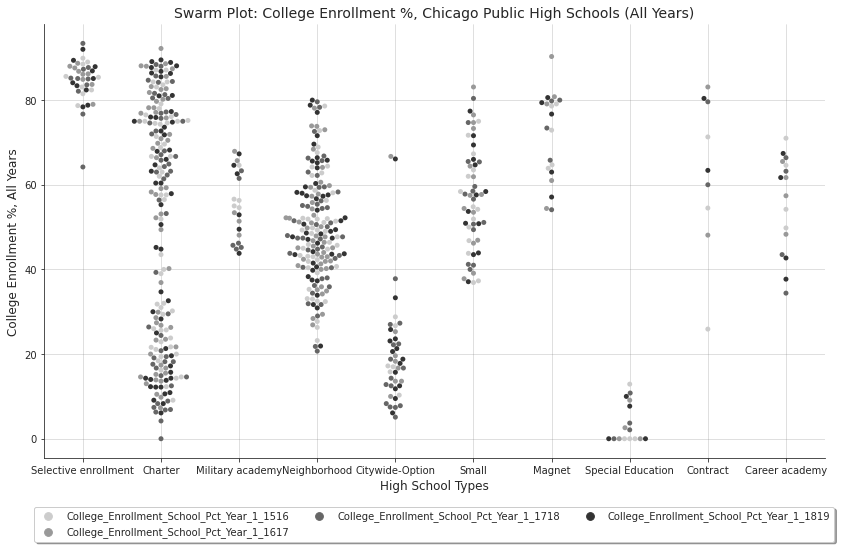

In [267]:
# Let's swarmplot to see all years of data collected for College Enrollment
fig, ax = plt.subplots(1, figsize = (14,8), sharex = True, sharey = True)

sns.swarmplot(x = college_prep_all_df.School_Type_1516, 
              y = college_prep_all_df.Percent, 
              hue = college_prep_all_df.Year,
              palette="gray_r")

plt.title("College Enrollment % (All Years)")

ax.set_title(f"Swarm Plot: College Enrollment %, Chicago Public High Schools (All Years)", size = 14 )
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("College Enrollment %, All Years", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.1),
          ncol=3, fancybox=True, shadow=True)

sns.despine()
sns.set_style('ticks')
plt.show()

In [268]:
college_prep_all_df.groupby('School_Type_1516').describe()

Percent                        ...                     
                       count       mean        std  ...    50%     75%   max
School_Type_1516                                    ...                     
Career academy          16.0  55.593750  11.486309  ...  59.55  64.825  71.0
Charter                209.0  50.262679  28.445823  ...  58.30  75.900  92.2
Citywide-Option         43.0  19.848837  12.791578  ...  17.20  23.350  66.7
Contract                 9.0  62.922222  18.476321  ...  63.40  79.600  83.1
Magnet                  20.0  71.735000  10.375187  ...  75.05  79.500  90.3
Military academy        22.0  55.500000   8.081608  ...  54.80  63.125  67.9
Neighborhood           177.0  49.641243  12.820095  ...  48.40  57.800  80.0
Selective enrollment    38.0  84.573684   5.064006  ...  85.15  87.675  93.4
Small                   55.0  57.045455  12.339695  ...  57.50  65.450  83.1
Special Education       16.0   3.681250   4.712992  ...   1.05   8.050  12.9

[10 rows x 8 columns]

## 2c. Compare Data and Welch T-Test to Check Significance

### Separate and Compare Data

In [269]:
#Separate the data into dataframes
charter_college_df = category_find(college_prep_all_df, 'School_Type_1516', 'Charter', exact = False)
neighborhood_college_df = category_find(college_prep_all_df, 'School_Type_1516', 'Neighborhood', exact = False)

(array([32., 54., 47., 40., 73., 84., 85., 66., 74., 50.]),
 array([ 0.  ,  9.34, 18.68, 28.02, 37.36, 46.7 , 56.04, 65.38, 74.72,
        84.06, 93.4 ]),
 <a list of 10 Patch objects>)

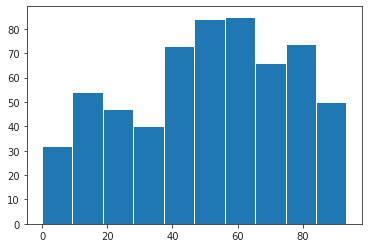

In [270]:
#Histogram of values
plt.hist(college_prep_all_df['Percent'], bins = 10)

In [271]:
#Are the variances equal?
np.nanvar(charter_college_df.Percent) == np.nanvar(neighborhood_college_df.Percent)

False

### So our data is:
- Unpaired, 
- unequal variance, 
- parametric --> 
Welch T-Test  

Ref: https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62

Welch T-Test
(Ref: https://www.statology.org/welch-t-test-python/)

In [272]:
#Import Scipy and Omit NaNs.
from scipy import stats

stat, p = stats.ttest_ind(charter_college_df.Percent, 
                neighborhood_college_df.Percent,
                equal_var = False, 
                nan_policy = 'omit')

print(f"Test Stat = {stat} \nP-value = {p}")

Test Stat = 0.28364091061519503 
P-value = 0.7768816293914667


In [273]:
alpha = 0.05
if p > alpha:
	print('Fail to reject H0')
else:
	print('Reject H0')

Fail to reject H0


In [306]:
#Comparing Means
print(f"Charter Schools mean: {np.nanmean(charter_college_df.Percent)}")
print(f"Charter Schools median: {np.nanmedian(charter_college_df.Percent)}")

print(f"Neighborhood Schools mean: {np.nanmean(neighborhood_college_df.Percent)}")
print(f"Neighborhood Schools median: {np.nanmedian(neighborhood_college_df.Percent)}")

Charter Schools mean: 50.26267942583733
Charter Schools median: 58.3
Neighborhood Schools mean: 49.64124293785311
Neighborhood Schools median: 48.4


### Summary (College Entrance Rates)
- Accept Null Hypothesis (p-value > .05)
- Charter Schools (n=209 / μ = 50.26) and 
- Neighborhood Schools (n=177/ μ = 49.64)  

In this case, we have to reject the null hypothesis. Charter schools did not perform significantly better than Neighborhood schools in terms of college entrance rates. There may be a difference between the two types of schools, but it isn't significant, with a P-value > .05. 

# 3. Comparing Graduation Rates between Charter Schools and Neighborhood Schools
Next, we can take a look at the graduation rates of students in high school, another strong indicator of delivering successful instruction. Higher graduation rates should naturally suggest that the overall education being delivered is at a higher quality- more students are on-board, etc.


Data Definitions: https://www.splitgraph.com/cityofchicago/chicago-public-schools-school-progress-reports-cp7s-7gxg

*Note: "Year_1" is 2 years ago, "Year_2" is last year's graduation data.*

**Null Hypothesis (h0) = There is no difference in high school graduation rates for high school students attending charter and neighborhood schools in Chicago.  
Alternate Hypothesis (h1) = There is a significant difference in high school graduation rates for high school students attending charter and neighborhood schools in Chicago.**

In [274]:
for elem in full_df.columns:
    if "graduation" in elem.lower():
        print(elem)

Progress_Toward_Graduation_Year_1_1516
Progress_Toward_Graduation_Year_2_1516
Graduation_4_Year_School_Pct_Year_2
Graduation_4_Year_CPS_Pct_Year_2
Graduation_4_Year_School_Pct_Year_1
Graduation_4_Year_CPS_Pct_Year_1
Graduation_5_Year_School_Pct_Year_2
Graduation_5_Year_CPS_Pct_Year_2
Graduation_5_Year_School_Pct_Year_1
Graduation_5_Year_CPS_Pct_Year_1
Progress_Toward_Graduation_Year_1_1617
Progress_Toward_Graduation_Year_2_1617
Graduation_4_Year_School_Pct_Year_2_1718
Graduation_4_Year_CPS_Pct_Year_2_1718
Graduation_4_Year_School_Pct_Year_1_1718
Graduation_4_Year_CPS_Pct_Year_1_1718
Graduation_5_Year_School_Pct_Year_2_1718
Graduation_5_Year_CPS_Pct_Year_2_1718
Graduation_5_Year_School_Pct_Year_1_1718
Graduation_5_Year_CPS_Pct_Year_1_1718
Progress_Toward_Graduation_Year_1_1718
Progress_Toward_Graduation_Year_2_1718
Graduation_4_Year_School_Pct_Year_2_1819
Graduation_4_Year_CPS_Pct_Year_2_1819
Graduation_4_Year_School_Pct_Year_1_1819
Graduation_4_Year_CPS_Pct_Year_1_1819
Graduation_5_Yea

In [275]:
#Create the dataframe by selecting elements relating to graduation
base_list = ["School_ID", "Long_Name_1516","School_Type_1516",'Primary_Category_1516']
clg_prep_list =[elem for elem in full_df if ("graduation_4_year_school_pct_year_2" in elem.lower()) or (elem.lower() == "graduation_4_year_school_pct_year_1")]

*Note:* Unfortunately, for graduation rates, we only have data from 1617/1718/1819.  
However, we have two years of data for each year. Year 2 is the last year, and Year 1 is the year before, so we actually have all four years here.

In [276]:
#Let's create the more-focused dataframe for these items
gradrate_df = full_df[base_list + clg_prep_list]

#'Year 1' Denotes 2 years ago; year_1 == year 2 1516
gradrate_df = gradrate_df.rename(columns={"Graduation_4_Year_School_Pct_Year_2": "Graduation_4_Year_School_Pct_Year_2_1617",
                                          "Graduation_4_Year_School_Pct_Year_1": "Graduation_4_Year_School_Pct_Year_2_1516"})

#Create focused dataframe (only HS)
gradrate_hs_df = category_find(gradrate_df, 'Primary_Category_1516', 'HS')

In [277]:
#Check the data before proceeding
gradrate_hs_df.head()

,School_ID,Long_Name_1516,School_Type_1516,Primary_Category_1516,Graduation_4_Year_School_Pct_Year_2_1617,Graduation_4_Year_School_Pct_Year_2_1516,Graduation_4_Year_School_Pct_Year_2_1718,Graduation_4_Year_School_Pct_Year_2_1819
0,610547,South Shore Intl College Prep High School,Selective enrollment,HS,85.8,69.6,86.9,94.5
1,400097,Noble - Chicago Bulls College Prep,Charter,HS,77.8,62.6,84.9,82.4
4,609678,William Jones College Preparatory High School,Selective enrollment,HS,97.6,90.4,93.3,95.2
5,400136,YCCS-Olive Harvey Middle College HS,Charter,HS,NaN,NaN,NaN,NaN
9,610513,Air Force Academy High School,Military academy,HS,75.7,80.2,78.9,75.5


Looks OK. Now we have data from the years that we need, and graduation rates over the last four years. Since we are looking at how all of the schools are doing, let's take a similar process to the last step. 



In [278]:
#Looking at the shape of the data...
gradrate_hs_df.shape

(188, 8)

In [279]:
#What missing values are there?
gradrate_hs_df.isna().sum()

School_ID                                    0
Long_Name_1516                               0
School_Type_1516                             0
Primary_Category_1516                        0
Graduation_4_Year_School_Pct_Year_2_1617    59
Graduation_4_Year_School_Pct_Year_2_1516    71
Graduation_4_Year_School_Pct_Year_2_1718    49
Graduation_4_Year_School_Pct_Year_2_1819    48
dtype: int64

## 3b. Melt data into single column so that we can graph it...

In [280]:
#Melt dataframe for all years
gradrate_mlt_df = gradrate_hs_df[['School_Type_1516',
                                 'Graduation_4_Year_School_Pct_Year_2_1516',
                                 'Graduation_4_Year_School_Pct_Year_2_1617',
                                 'Graduation_4_Year_School_Pct_Year_2_1718',
                                 'Graduation_4_Year_School_Pct_Year_2_1819',
                                 ]]

gradrate_mlt_df = pd.melt(gradrate_mlt_df, id_vars=['School_Type_1516'], 
                              var_name='Year', 
                              value_name='Percent')

gradrate_mlt_df
#gradrate_mlt_df.isna().sum()

,School_Type_1516,Year,Percent
0,Selective enrollment,Graduation_4_Year_School_Pct_Year_2_1516,69.6
1,Charter,Graduation_4_Year_School_Pct_Year_2_1516,62.6
2,Selective enrollment,Graduation_4_Year_School_Pct_Year_2_1516,90.4
3,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN
4,Military academy,Graduation_4_Year_School_Pct_Year_2_1516,80.2
...,...,...,...
747,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
748,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
749,Charter,Graduation_4_Year_School_Pct_Year_2_1819,NaN
750,Citywide-Option,Graduation_4_Year_School_Pct_Year_2_1819,3.3


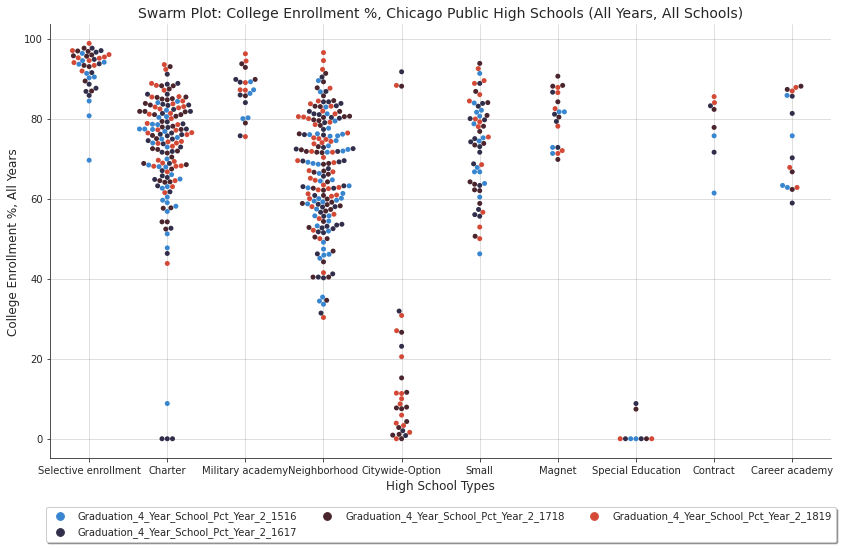

In [281]:
# Let's swarmplot to see all years of data collected for College Enrollment
fig, ax = plt.subplots(1, figsize = (14,8), sharex = True, sharey = True)

sns.swarmplot(x = gradrate_mlt_df.School_Type_1516, 
              y = gradrate_mlt_df.Percent, 
              hue = gradrate_mlt_df.Year,
              palette="icefire")

plt.title("College Enrollment % (All Years)")

ax.set_title(f"Swarm Plot: College Enrollment %, Chicago Public High Schools (All Years, All Schools)", size = 14 )
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("College Enrollment %, All Years", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.1),
          ncol=3, fancybox=True, shadow=True)

sns.despine()
sns.set_style('ticks')
plt.show()

Looks like Neighborhood and Charter Schools are have somewhat similar College Enrollment Numbers... hard to tell

In [282]:
#And create two smaller dataframes so that we can compare them in a T-Test
charter_grad_srs = category_find(gradrate_mlt_df, 'School_Type_1516', 'Charter', exact = False)
nbd_grad_srs = category_find(gradrate_mlt_df, 'School_Type_1516', 'Neighborhood', exact = False)

### Check the new dataframes and Nulls

In [283]:
#Let's look at the charter data
charter_grad_srs.head(3)

,School_Type_1516,Year,Percent
1,Charter,Graduation_4_Year_School_Pct_Year_2_1516,62.6
3,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN
6,Charter,Graduation_4_Year_School_Pct_Year_2_1516,NaN


In [284]:
#What nulls do we have?
charter_grad_srs.isna().sum()

School_Type_1516      0
Year                  0
Percent             134
dtype: int64

In [285]:
#What neighborhood nulls do we have?
nbd_grad_srs.isna().sum()

School_Type_1516    0
Year                0
Percent             8
dtype: int64

(array([ 29.,   5.,   4.,   8.,  18.,  54.,  91., 118., 140.,  58.]),
 array([ 0.  ,  9.88, 19.76, 29.64, 39.52, 49.4 , 59.28, 69.16, 79.04,
        88.92, 98.8 ]),
 <a list of 10 Patch objects>)

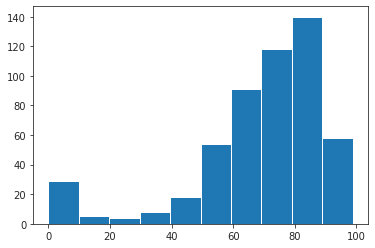

In [287]:
#What does the distribution look like?
plt.hist(gradrate_mlt_df.Percent)

Unlike the first distribution, this does appears to be non-parametric (non-normal). 

In [288]:
#Are the variances equal?
np.nanvar(charter_grad_srs.Percent) == np.nanvar(nbd_grad_srs.Percent)

False

In [289]:
#Comparing Means
print(f"Charter Schools mean: {np.nanmean(charter_grad_srs.Percent)}")
print(f"Charter Schools median: {np.nanmedian(charter_grad_srs.Percent)}")

print(f"Neighborhood Schools mean: {np.nanmean(nbd_grad_srs.Percent)}")
print(f"Neighborhood Schools median: {np.nanmedian(nbd_grad_srs.Percent)}")

Charter Schools mean: 72.40821917808218
Charter Schools median: 75.9
Neighborhood Schools mean: 66.56722222222223
Neighborhood Schools median: 67.25


Let's check to see if the difference between charter schools and neighborhood schools is significant. 

This time, we'll use Mann-Whitney, since the data is 
- unpaired, 
- non-parametric, 
- different variances. 

*Ref:* https://www.statology.org/mann-whitney-u-test-python/  
https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [290]:
#Import Scipy and Omit NaNs.
from scipy.stats import mannwhitneyu

stat, p = stats.mannwhitneyu(nbd_grad_srs['Percent'].dropna(), charter_grad_srs['Percent'].dropna())

print(f"Test Stat = {stat} \nP-value = {p}")

Test Stat = 9217.5 
P-value = 1.7876595101993479e-06


In [291]:
#Check Null Hypothesis
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('reject H0')

reject H0


So, with a pvalue at 1.7e-06 (far lower than p=.05), the difference is definitely significant between the two- charter Schools graduate students at a higher rate than neighborhood schools.  

*However*, one of the issues with the data is the frequency of reporting.     Looking at the number of nulls as a percent of the data... 

In [292]:
print(f"Charter Nulls: {charter_grad_srs['Percent'].isna().sum() / charter_grad_srs.shape[0]}")
print(f"Nbd Nulls: {nbd_grad_srs['Percent'].isna().sum() / nbd_grad_srs.shape[0]}")

Charter Nulls: 0.4785714285714286
Nbd Nulls: 0.0425531914893617


## Summary: Graduation Rates
- Reject Null Hypothesis (p<.05)
- Charter Schools (n=145 / μ = 72) and
- Neighborhood Schools (n=180/ μ = 65)

*Caveat:* 47% of the graduation data from the charter schools is missing, compared to only 4% for neighborhood schools! If the school is reporting, it probably does better than a neighborhood school equivalent, but the issue is that schools which perform lower may not be reporting their graduation data. 

It is difficult to know if this was intentional underreporting, if schools are not collecting or lack data, etc. **If lower-performing charter schools are delibrately not reporting their data, it would be difficult to make assumptions despite the significant difference.**

# 4. Attendance Differences Between Charter High Schools and Neighborhood High Schools

**Null Hypothesis (h0) = There is no difference in high school attendance  for high school students attending charter and neighborhood schools in Chicago.  
Alternate Hypothesis (h1) = There is a significant attendance in high school graduation rates for high school students attending charter and neighborhood schools in Chicago.** 

In [293]:
for elem in full_df:
    if "student_attendance" in elem.lower():
        print(elem)

Student_Attendance_Year_1_Pct_1516
Student_Attendance_Year_2_Pct_1516
Student_Attendance_Avg_Pct_1516
Student_Attendance_Year_1_Pct_1617
Student_Attendance_Year_2_Pct_1617
Student_Attendance_Avg_Pct_1617
Student_Attendance_Year_1_Pct_1718
Student_Attendance_Year_2_Pct_1718
Student_Attendance_Avg_Pct_1718
Student_Attendance_Year_1_Pct_1819
Student_Attendance_Year_2_Pct_1819
Student_Attendance_Avg_Pct_1819


*Note: The 'Year_1' denotes 2 years ago, and 'Year_2' denotes 1 year ago, according to the data definitions on the data. So, we have 5 years of data to work with here, since 2016-2016 'Year_1' == 2014-2015 'Year_2'.*

In [294]:
#Create the dataframe by selecting elements relating to graduation
base_list = ["School_ID", "Long_Name_1516","School_Type_1516",'Primary_Category_1516']
att_list =[elem for elem in full_df if ("student_attendance_year_2" in elem.lower()) or (elem.lower() == "student_attendance_year_1_pct_1516")]

att_df = full_df[base_list + att_list]

#Since 'Year 1' is 2 years ago, we'll rename it as 'Year_2_pct'
att_df = att_df.rename(columns={"Student_Attendance_Year_1_Pct_1516": "Student_Attendance_Year_2_Pct_1415"})

#Focus on HS only
att_hs_df = category_find(att_df, 'Primary_Category_1516', 'HS')

In [307]:
att_hs_df.head(3)

,School_ID,Long_Name_1516,School_Type_1516,Primary_Category_1516,Student_Attendance_Year_2_Pct_1415,Student_Attendance_Year_2_Pct_1516,Student_Attendance_Year_2_Pct_1617,Student_Attendance_Year_2_Pct_1718,Student_Attendance_Year_2_Pct_1819
0,610547,South Shore Intl College Prep High School,Selective enrollment,HS,90.5,87.0,90.2,90.1,90.9
1,400097,Noble - Chicago Bulls College Prep,Charter,HS,93.4,93.1,94.2,93.4,93.4
4,609678,William Jones College Preparatory High School,Selective enrollment,HS,93.9,93.8,93.2,92.3,93.0


In [296]:
#Create and melt the columns
att_cols = [col for col in att_hs_df.columns if "student_attendance" in col.lower()]
att_cols.append('School_Type_1516')

att_hs_mlt_df = att_hs_df[att_cols]

att_hs_mlt_df = pd.melt(att_hs_mlt_df, id_vars=['School_Type_1516'], 
                              var_name='Year', 
                              value_name='Percent')

att_hs_mlt_df

,School_Type_1516,Year,Percent
0,Selective enrollment,Student_Attendance_Year_2_Pct_1415,90.5
1,Charter,Student_Attendance_Year_2_Pct_1415,93.4
2,Selective enrollment,Student_Attendance_Year_2_Pct_1415,93.9
3,Charter,Student_Attendance_Year_2_Pct_1415,86.0
4,Military academy,Student_Attendance_Year_2_Pct_1415,92.3
...,...,...,...
935,Charter,Student_Attendance_Year_2_Pct_1819,59.6
936,Charter,Student_Attendance_Year_2_Pct_1819,NaN
937,Charter,Student_Attendance_Year_2_Pct_1819,69.1
938,Citywide-Option,Student_Attendance_Year_2_Pct_1819,59.5


In [297]:
att_hs_mlt_df.groupby('School_Type_1516').agg(['count', 'mean', 'median','var'])

Percent                              
                       count       mean median         var
School_Type_1516                                          
Career academy            20  87.415000  88.15    6.469763
Charter                  327  84.621407  90.90  151.774755
Citywide-Option           90  68.506667  68.50  263.768494
Contract                  12  91.808333  90.25   21.739015
Magnet                    35  92.360000  93.00    5.197176
Military academy          30  92.856667  92.80    3.303230
Neighborhood             230  86.020000  86.90   29.816803
Selective enrollment      50  92.612000  92.90    2.897812
Small                     69  87.497101  88.30   23.419697
Special Education         20  89.115000  89.30    4.564500

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


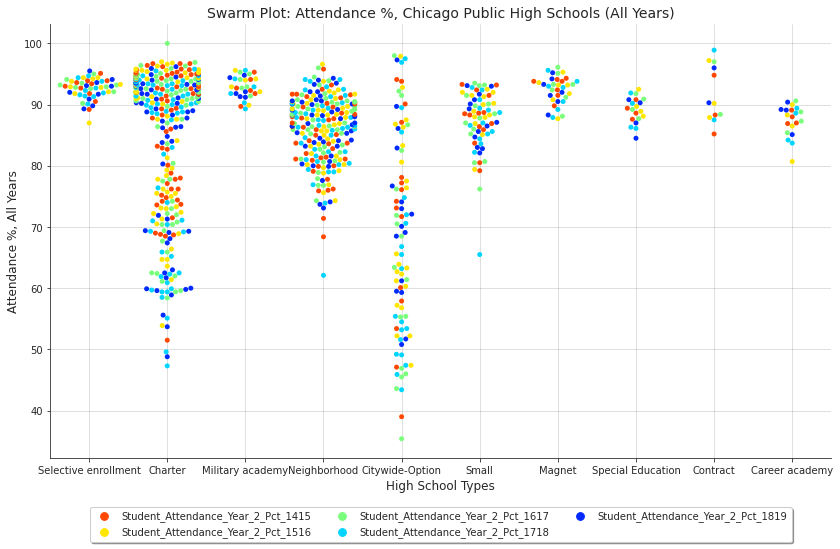

In [298]:
# Let's swarmplot to see all years of data collected for College Enrollment
fig, ax = plt.subplots(1, figsize = (14,8), sharex = True, sharey = True)

sns.swarmplot(x = att_hs_mlt_df.School_Type_1516, 
              y = att_hs_mlt_df.Percent, 
              hue = att_hs_mlt_df.Year,
              palette="jet_r")

plt.title("Attendance % (All Years)")

ax.set_title(f"Swarm Plot: Attendance %, Chicago Public High Schools (All Years)", size = 14 )
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Attendance %, All Years", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.1),
          ncol=3, fancybox=True, shadow=True)

sns.despine()
sns.set_style('ticks')
plt.show()

(array([  2.,  10.,  16.,  29.,  30.,  54.,  72., 145., 376., 149.]),
 array([ 35.4 ,  41.86,  48.32,  54.78,  61.24,  67.7 ,  74.16,  80.62,
         87.08,  93.54, 100.  ]),
 <a list of 10 Patch objects>)

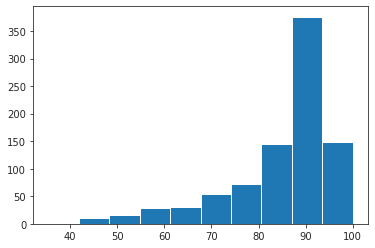

In [299]:
plt.hist(att_hs_mlt_df.Percent, bins = 10)

This doesn't appear to be a normal distribution at all.

In [300]:
#And create two smaller dataframes so that we can compare them in a T-Test
charter_att_df = category_find(att_hs_mlt_df, 'School_Type_1516', 'Charter', exact = False)
nbd_att_df = category_find(att_hs_mlt_df, 'School_Type_1516', 'Neighborhood', exact = False)

In [301]:
#Nulls in the data
print(f"charter nulls: {charter_att_df.isna().sum().sum()}")
print(f"nbd nulls: {nbd_att_df.isna().sum().sum()}")

charter nulls: 23
nbd nulls: 5


In [302]:
charter_att_df.head()

,School_Type_1516,Year,Percent
1,Charter,Student_Attendance_Year_2_Pct_1415,93.4
3,Charter,Student_Attendance_Year_2_Pct_1415,86.0
6,Charter,Student_Attendance_Year_2_Pct_1415,91.8
14,Charter,Student_Attendance_Year_2_Pct_1415,95.0
15,Charter,Student_Attendance_Year_2_Pct_1415,92.5


In [303]:
from scipy.stats import mannwhitneyu

# compare samples
stat, p = stats.mannwhitneyu(nbd_att_df['Percent'].dropna(), charter_att_df['Percent'].dropna())
print('Statistics=%.8f, p=%.8f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=30704.50000000, p=0.00011225
Different distribution (reject H0)


With a p-value under .05, there is a difference between the student attendance at charter schools (84.6) and neighborhood schools (86). In this case, Neighborhood schools have a significantly-better attendance record than charter schools.

## Summary (Attendance)
- Reject Null Hypothesis (p-value <.05)
- Charter Schools (n=327 / μ = 84.6) and
- Neighborhood Schools (n=230 / μ = 86)

Neighborhood Schools have better attendance than Charter Schools.

# 5. Conclusions
The focus of this project was to merge datasets, look through historical records of the schools in terms of performance data, and compare. I used two kinds of T-testing, as well as visualizations.

## From an exploratory look, I found...
* Students at neighborhood schools have **better attendance rates** than students at Charter Schools. 
* Charter Schools appear to **perform better** for students in terms of graduation rates, although many fewer schools did not report data. 
* Charter Schools **do not appear to do any better on College Entrance rates**, however, with only a statistically-insignificant difference between Neighborhood and Charter Schools.
* Overall, charter schools appear to have some advantages and disadvantages to neighborhood schools.

## Caveats
This analysis only looked at Educational outcomes for students (high school graduation and college attendance rates). It does not control for possible factors in terms of differences between schools within neighborhood schools and charter school groups, nor control for differences in the populations of students who are attending each school.

## Things I learned
- Creating visualizations
- Merging and Joining Data (and types of joins)
- Using T-Tests to check for significance
- Considerations for each type of T-test to use (parametric/nonpara, variance, etc.)
- Whether or not there was a significant difference between two sets of data.

#### Additional Information on Charter vs. Neighborhood Schools: 
*See:*
- https://www.greatschools.org/gk/articles/public-private-charter-schools/
- https://rhodesschool.org/differences-between-charter-and-public-schools/
- https://news.uchicago.edu/story/uchicago-consortium-studies-differences-between-cps-charter-non-charter-schools